# PYTHON RANDOM FOREST UND GRADIENT BOOSTING DEMO

#### TRAINING AND TEST DATASET

In [10]:
# Create Regression Task
# y(X) = 10 * sin(pi * X[:, 0] * X[:, 1]) + 20 * (X[:, 2] - 0.5) ** 2 + 10 * X[:, 3] + 5 * X[:, 4] + noise * N(0, 1)
from sklearn.datasets import make_friedman1

X, y = make_friedman1(n_samples=1200, n_features=10, noise=1.0, random_state=123)

X_train, X_test = X[200:], X[:200]
y_train, y_test = y[200:], y[:200]

#### FIT DECISION TREE

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Fit Weak Learner
model = DecisionTreeRegressor(max_depth=10, random_state=123)
model.fit(X_train, y_train)

err_train = mean_squared_error(y_train, model.predict(X_train))
err_test  = mean_squared_error(y_test,  model.predict(X_test))

baseline_CART  = err_test

import numpy as np

print("Error (Training):", np.round(err_train, 3))
print("Error (Test):",     np.round(err_test, 3), "(Baseline CART)")

Error (Training): 0.543
Error (Test): 9.169 (Baseline CART)


#### FIT RANDOM FOREST ENSEMBLE

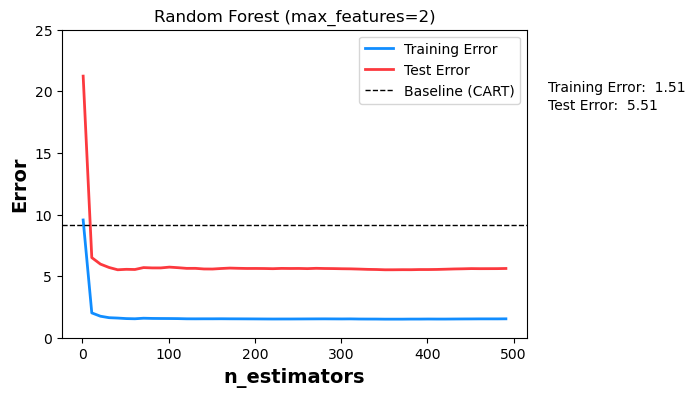

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

list_n_estimators = []
list_err_train    = []
list_err_test     = []

# Fit Random Forest Model
for value in range(1, 500+1, 10):
    model = RandomForestRegressor(n_estimators=value, max_depth=10, max_features=2, random_state=123, n_jobs=-1)
    model.fit(X_train, y_train)
    
    err_train = mean_squared_error(y_train, model.predict(X_train))
    err_test  = mean_squared_error(y_test,  model.predict(X_test))
    list_n_estimators.append(value)
    list_err_train.append(err_train)
    list_err_test.append(err_test)

min_err_train = min(list_err_train)
min_err_test  = min(list_err_test)
baseline_RF = min_err_test

# Plot Training and Test Error against n_estimators
%matplotlib inline

import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(6,4))
plt.title('Random Forest (max_features=2)')
plt.plot(list_n_estimators, list_err_train, color='#118DFF', ls='-',  lw=2, label='Training Error')
plt.plot(list_n_estimators, list_err_test,  color='#FC393E', ls='-',  lw=2, label='Test Error')
plt.axhline(baseline_CART, color='#000000', ls='--', lw=1, label='Baseline (CART)')
plt.legend(loc='upper right')
plt.text(value + value/10, 20.0, 'Training Error: %5.2f' %min_err_train)
plt.text(value + value/10, 18.5, 'Test Error: %5.2f' %min_err_test)
plt.xlabel("n_estimators",   fontsize=14, weight='bold')
plt.ylabel("Error",          fontsize=14, weight='bold')
plt.ylim(0, 25)
plt.show()

#### FIT GRADIENT BOOSTING ENSEMBLE

##### Learning Rate = 1 |  n_estimators = 500

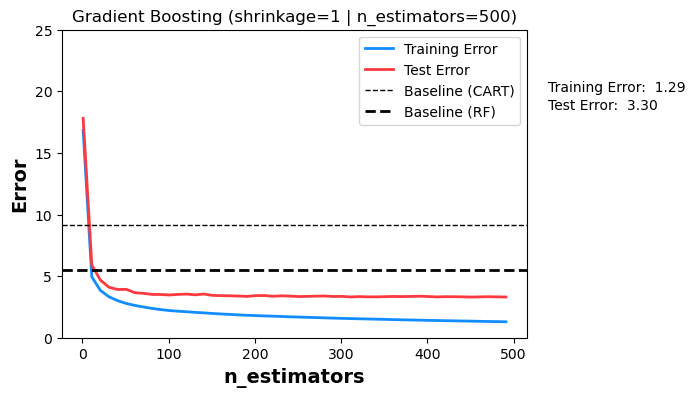

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

list_n_estimators = []
list_err_train    = []
list_err_test     = []

# Fit Gradient Boosting Model
for value in range(1, 500+1, 10):
    model = GradientBoostingRegressor(n_estimators=value, learning_rate=1, max_depth=1, random_state=123)
    model.fit(X_train, y_train)
    err_train = mean_squared_error(y_train, model.predict(X_train))
    err_test  = mean_squared_error(y_test,  model.predict(X_test))
    list_n_estimators.append(value)
    list_err_train.append(err_train)
    list_err_test.append(err_test)

min_err_train = min(list_err_train)
min_err_test  = min(list_err_test)

# Plot Training and Test Error against n_estimators
%matplotlib inline

import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(6,4))
plt.title('Gradient Boosting (shrinkage=1 | n_estimators=500)')
plt.plot(list_n_estimators, list_err_train, color='#118DFF', ls='-',  lw=2, label='Training Error')
plt.plot(list_n_estimators, list_err_test,  color='#FC393E', ls='-',  lw=2, label='Test Error')
plt.axhline(baseline_CART, color='#000000', ls='--', lw=1, label='Baseline (CART)')
plt.axhline(baseline_RF,   color='#000000', ls='--', lw=2, label='Baseline (RF)')
plt.legend(loc='upper right')
plt.text(value + value/10, 20.0, 'Training Error: %5.2f' %min_err_train)
plt.text(value + value/10, 18.5, 'Test Error: %5.2f' %min_err_test)
plt.xlabel("n_estimators",   fontsize=14, weight='bold')
plt.ylabel("Error",          fontsize=14, weight='bold')
plt.ylim(0, 25)
plt.show()

##### Learning Rate = 0.1 | n_estimators = 1000

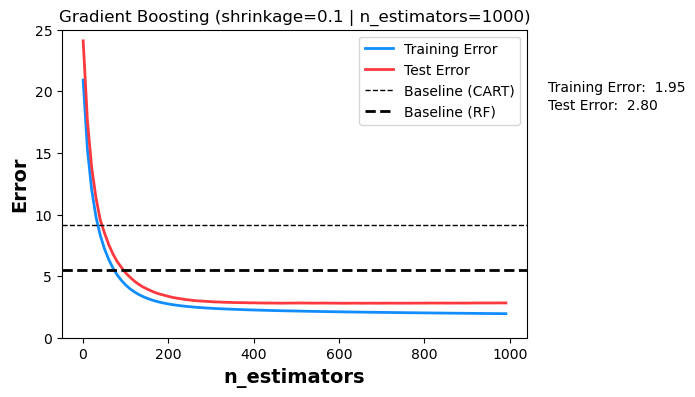

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

list_n_estimators = []
list_err_train    = []
list_err_test     = []

# Fit Gradient Boosting Model
for value in range(1, 1000+1, 10):
    model = GradientBoostingRegressor(n_estimators=value, learning_rate=0.1, max_depth=1, random_state=123)
    model.fit(X_train, y_train)
    err_train = mean_squared_error(y_train, model.predict(X_train))
    err_test  = mean_squared_error(y_test,  model.predict(X_test))
    list_n_estimators.append(value)
    list_err_train.append(err_train)
    list_err_test.append(err_test)

min_err_train   = min(list_err_train)
min_err_test    = min(list_err_test)

# Plot Training and Test Error against n_estimators
%matplotlib inline

import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(6,4))
plt.title('Gradient Boosting (shrinkage=0.1 | n_estimators=1000)')
plt.plot(list_n_estimators, list_err_train, color='#118DFF', ls='-',  lw=2, label='Training Error')
plt.plot(list_n_estimators, list_err_test,  color='#FC393E', ls='-',  lw=2, label='Test Error')
plt.axhline(baseline_CART, color='#000000', ls='--', lw=1, label='Baseline (CART)')
plt.axhline(baseline_RF,   color='#000000', ls='--', lw=2, label='Baseline (RF)')
plt.legend(loc='upper right')
plt.text(value + value/10, 20.0, 'Training Error: %5.2f' %min_err_train)
plt.text(value + value/10, 18.5, 'Test Error: %5.2f' %min_err_test)
plt.xlabel("n_estimators",   fontsize=14, weight='bold')
plt.ylabel("Error",          fontsize=14, weight='bold')
plt.ylim(0, 25)
plt.show()

##### Learning Rate = 0.01 | n_estimators = 5000

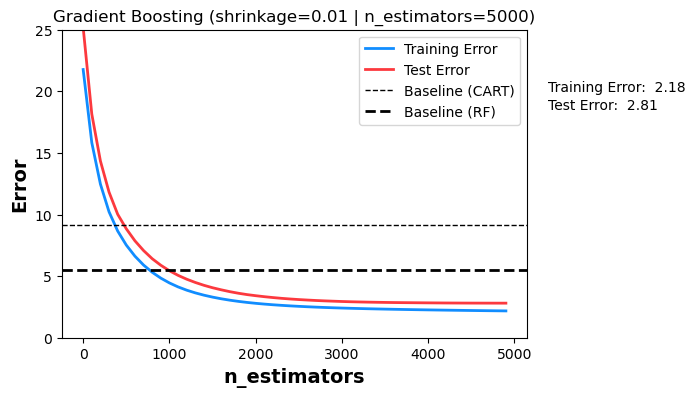

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

list_n_estimators = []
list_err_train    = []
list_err_test     = []

# Fit Gradient Boosting Model
for value in range(1, 5000+1, 100):
    model = GradientBoostingRegressor(n_estimators=value, learning_rate=0.01, max_depth=1, random_state=123)
    model.fit(X_train, y_train)
    err_train = mean_squared_error(y_train, model.predict(X_train))
    err_test  = mean_squared_error(y_test,  model.predict(X_test))
    list_n_estimators.append(value)
    list_err_train.append(err_train)
    list_err_test.append(err_test)

min_err_train   = min(list_err_train)
min_err_test    = min(list_err_test)

# Plot Training and Test Error against n_estimators
%matplotlib inline

import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(6,4))
plt.title('Gradient Boosting (shrinkage=0.01 | n_estimators=5000)')
plt.plot(list_n_estimators, list_err_train, color='#118DFF', ls='-',  lw=2, label='Training Error')
plt.plot(list_n_estimators, list_err_test,  color='#FC393E', ls='-',  lw=2, label='Test Error')
plt.axhline(baseline_CART, color='#000000', ls='--', lw=1, label='Baseline (CART)')
plt.axhline(baseline_RF,   color='#000000', ls='--', lw=2, label='Baseline (RF)')
plt.legend(loc='upper right')
plt.text(value + value/10, 20.0, 'Training Error: %5.2f' %min_err_train)
plt.text(value + value/10, 18.5, 'Test Error: %5.2f' %min_err_test)
plt.xlabel("n_estimators",   fontsize=14, weight='bold')
plt.ylabel("Error",          fontsize=14, weight='bold')
plt.ylim(0, 25)
plt.show()